### JWST Pipeline Processing of Wide Field Slitless Spectroscopy Exposures


#### Calspec2 steps       
    
- assign_wcs: Assigns a WCS object to dispersed exposures              
- background: Background subtraction                
- flatfield: Flat fielding             
- extract_2d: Extract cutouts  
- photom: Photometric correction      
- extract_1d: Extract 1D spectrum   


#### Calspec3 steps
 
- exp_to_source: Reformat files to contain one source from multiple exposures
- extract_1d: Final 1D extraction    
- combine_1d: Combine 1D spectra     


The following data is used in the notebook, provided by Nor on July 9, 2020

Direct image
jw01345005001_01101_00007_nrca5_uncal.fits

Grism image with row dispersion
jw01345005001_01101_00003_nrca5_uncalR.fits

Grism image with column dispersion
jw01345005001_01101_00008_nrca5_uncalC.fits



The following processing was done before the test

calwebb_detector1 was run on the three files.
calwebb_image2 and calwebb_image3 were run on the direct image. 
The name of the produced catalog file was saved in the SCATFLE keyword.

assign_wcs and extra ct_2d were run on the grism images. Extract_2d was run with spectral_order=1 and mmag_limit=20 to reduce the number of objects and processing time.

The files used in the test are the grism image and the output of extract_2d.


In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import patches

In [2]:
import numpy as np
from jwst import datamodels


In [3]:
# A simulated NIRCAM grism image is used in the examples. 
spec = datamodels.open("jw01345005001_01101_00003_nrca5_uncalR_extract_2d.fits")
specrate = datamodels.open("jw01345005001_01101_00003_nrca5_uncalR_assign_wcs.fits")

<IPython.core.display.Javascript object>


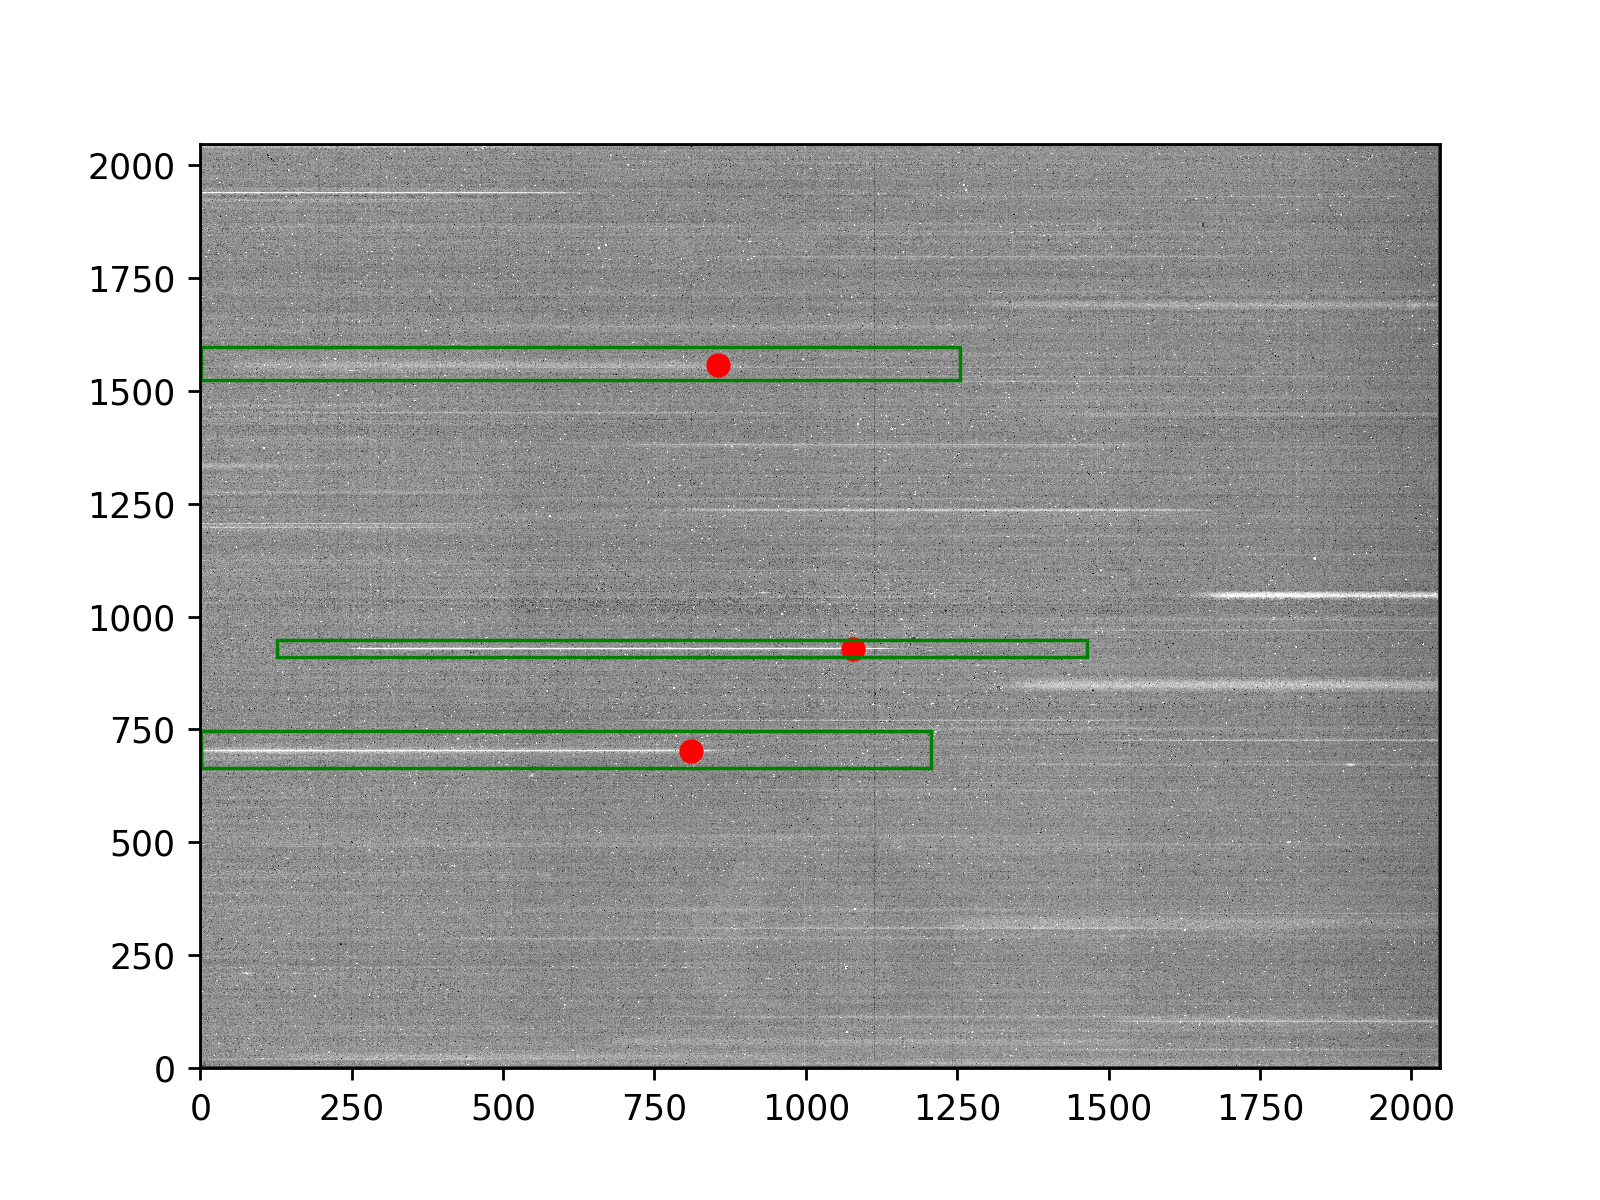

In [4]:
ax = plt.subplot(111)
plt.gray()

for slit in spec.slits:
    bbox = slit.meta.wcs.bounding_box
    xstart, ystart = slit.xstart, slit.ystart
    ax.add_patch(patches.Rectangle((bbox[0][0]+xstart, bbox[1][0]+ystart), 
                                   bbox[0][1]-bbox[0][0], bbox[1][1]-bbox[1][0], edgecolor='g',
                                   fill=False))
    
ax.imshow(specrate.data, aspect='auto', vmin=-.1, vmax=.3, origin='lower')
pos = np.array([(s.source_xpos, s.source_ypos) for s in spec.slits])
ax.scatter(pos[:,0], pos[:,1], c='r',)

In [5]:
direct = datamodels.open("jw01345005001_01101_00007_nrca5_i2d.fits")

In [6]:
from astropy.table import QTable

t = QTable.read("jw01345005001_01101_00007_nrca5_cat.ecsv")
#print(t['sky_centroid'].ra.value)
#print(t.colnames)
#print(t['xcentroid'])

<IPython.core.display.Javascript object>


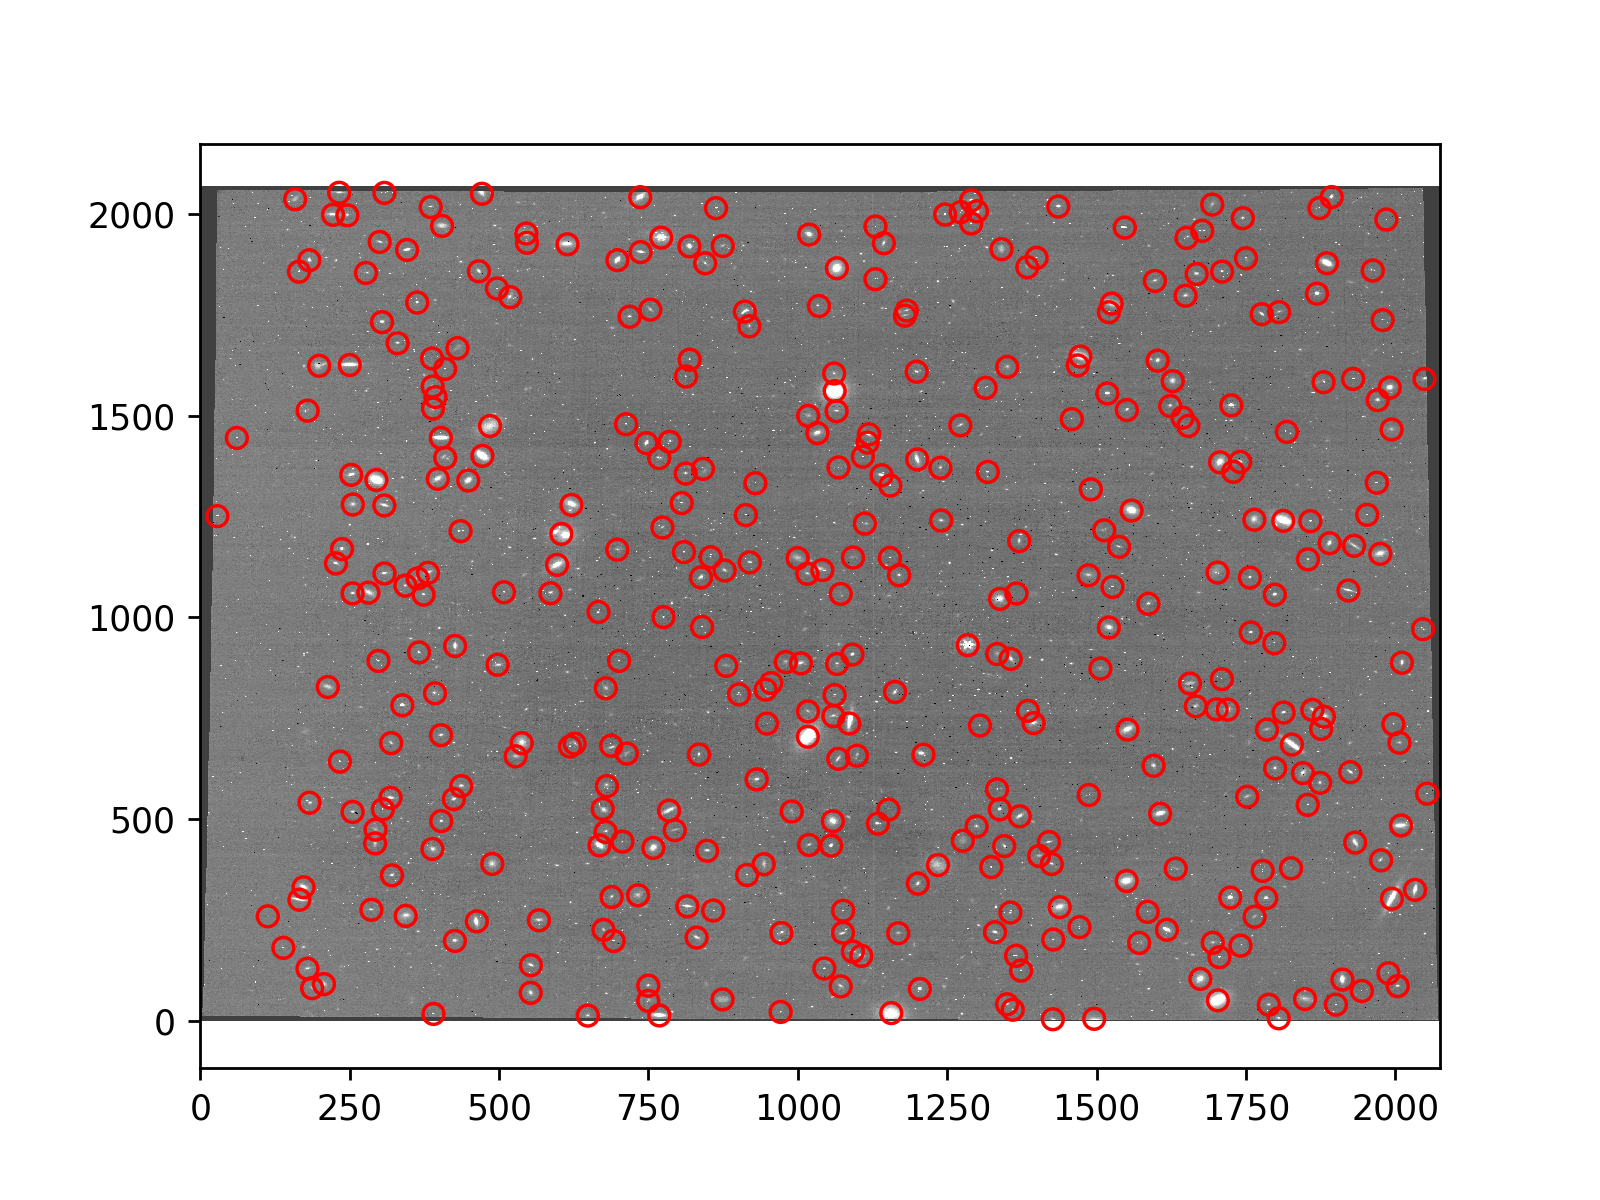

In [7]:
plt.imshow(direct.data, aspect='auto', vmin=-.1, vmax=.3, origin='lower')
x = t['xcentroid']
y = t['ycentroid']
plt.scatter(x, y, facecolors='none', edgecolors='r')

In [ ]:
plt.scatter?